# PythonLab

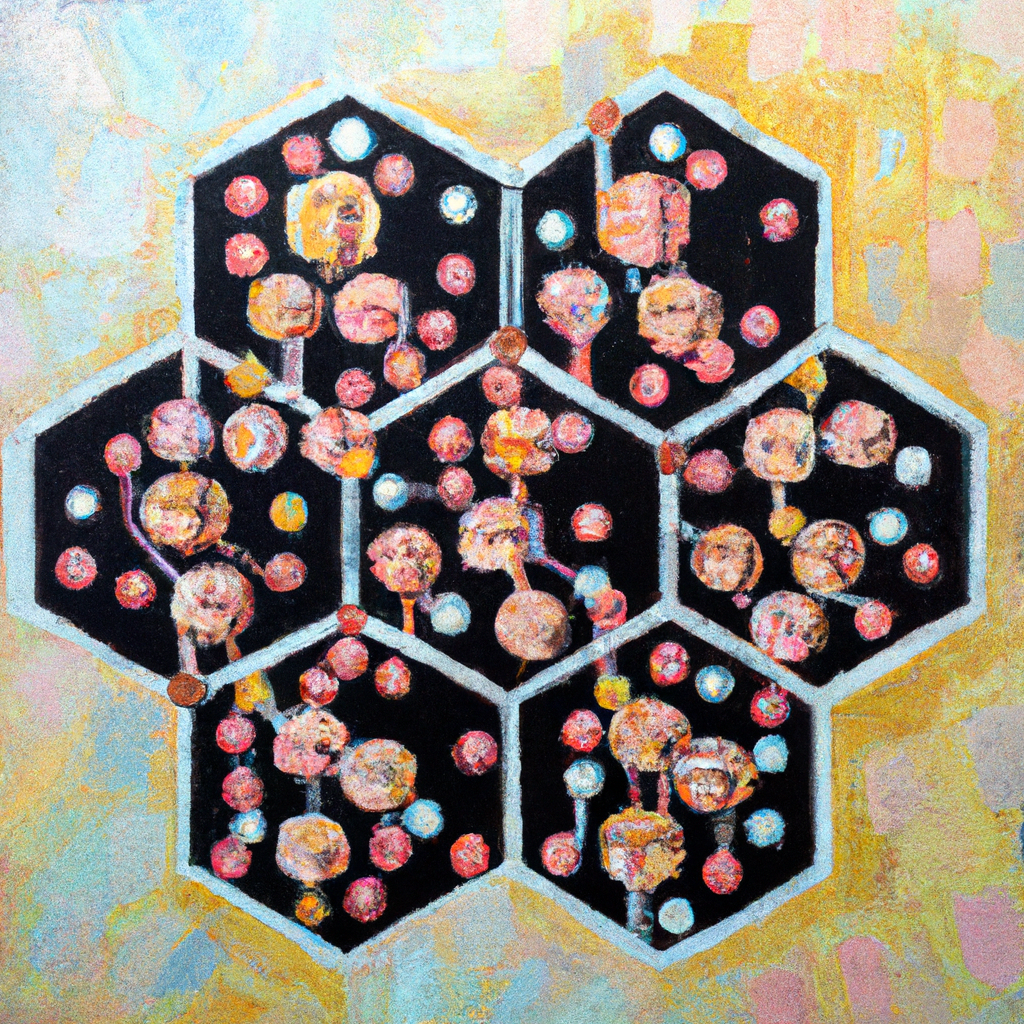

# Clustering

### What is clustering?

Clustering is a machine learning technique used to group similar data points together. The goal is to identify natural patterns in the data that can help us better understand it.
Clustering is an unsupervised learning technique, meaning that we don't have labeled data or predefined classes. Instead, the algorithm discovers patterns based on similarities between data points.

### Types of clustering algorithms

There are several types of clustering algorithms, but the three that will be covered in this notebook are KMeans, Hierarchical Clustering, and DBSCAN.

- KMeans is a centroid-based clustering algorithm that aims to partition the data into K clusters. It is simple and efficient, but it requires us to specify the number of clusters in advance.

- Hierarchical Clustering is a bottom-up approach that builds a hierarchy of clusters. It can be either agglomerative (starting with individual points and merging them into clusters) or divisive (starting with the entire dataset and recursively dividing it into smaller clusters). It doesn't require us to specify the number of clusters in advance, but it can be computationally expensive.

- DBSCAN is a density-based clustering algorithm that groups together points that are close to each other and have high density. It doesn't require us to specify the number of clusters in advance, but it can be sensitive to the choice of hyperparameters.

### Overview of the notebook

In this notebook, we will cover the three clustering algorithms mentioned above: KMeans, Hierarchical Clustering, and DBSCAN.
For each algorithm, we will first provide an overview of how it works, and then we will apply it to a sample dataset.
We will use the scikit-learn library in Python to implement the algorithms.
Finally, we will compare the results of the different algorithms and discuss their strengths and weaknesses.

## KMeans Clustering
KMeans is a popular unsupervised clustering algorithm that partitions the dataset into k clusters where each point belongs to the cluster with the nearest mean. The goal of KMeans is to minimize the sum of squared distances between points and their assigned cluster centers.

As a measure to judge how many clusters are in a given dataset, the Ellbow method is used. It is a graphical representation of the sum of squeared errors for different amounts of clusters. When the curve shows a distinct "ellbow" at a certain amount of clusters, this amount represents the optimal amount of clusters for this dataset. 

#### Theory
The algorithm works as follows:

- Randomly initialize k cluster centers.
- Assign each data point to the nearest cluster center.
- Recalculate the cluster centers as the mean of all data points assigned to it.
- Repeat steps 2-3 until convergence (i.e. when the assignment of points to clusters no longer changes).
- The value of k can be determined using techniques such as the elbow method or silhouette score.

#### Implementation
To implement KMeans clustering in Python, we can use the `KMeans` class from the `sklearn.cluster` module.
First the ellbow method is performed to get an idea about how many clusters could be found in the data. 

C:\Users\Jackson ferrao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


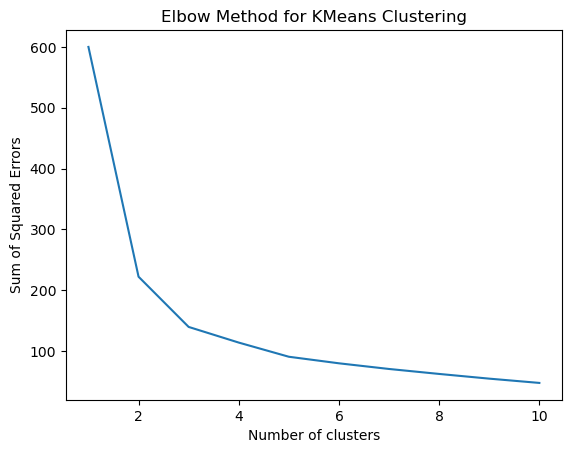

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

# Perform KMeans clustering for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

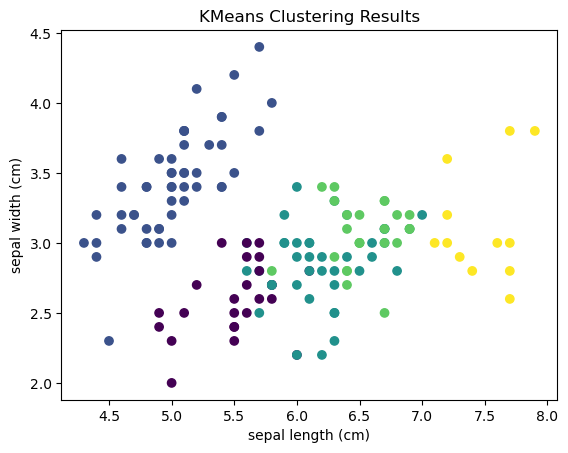

In [5]:
# Convert dataset to Pandas DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)

number_clusters = 5

# Initialize the KMeans object with the number of clusters (k)
kmeans = KMeans(n_clusters=number_clusters)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for the data
labels = kmeans.predict(X)

# Plot the data by predicted clusters
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KMeans Clustering Results')
plt.show()

In this example, we initialize the KMeans object with `n_clusters=x`, indicating that we want to partition the data into x clusters. We then `fit` the model to the data using the fit method, and predict the cluster labels for each data point using the `predict` method. We can also obtain the cluster centers using the `cluster_centers_` attribute of the `KMeans` object.

#### Evaluation
To evaluate the performance of KMeans clustering, we can use metrics such as the silhouette score or the inertia (sum of squared distances between points and their assigned cluster centers). We can also visualize the clustering results using scatterplots or other visualization techniques.

In [17]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering performance using the silhouette score
score = silhouette_score(X, labels)
print("Silhouette score:", score)

Silhouette score: 0.6810461692117462


In this example, we use the `silhouette_score` function from the `sklearn.metrics` module to compute the silhouette score for the clustering results. The silhouette score ranges from -1 to 1, with values closer to 1 indicating better clustering performance.

## Hierarchical Clustering

Hierarchical clustering, as the name suggests, involves creating a hierarchy of clusters. It can be either agglomerative or divisive. In agglomerative hierarchical clustering, each data point starts as its own cluster, and then the algorithm iteratively merges the closest clusters until only one large cluster remains. In divisive hierarchical clustering, all data points start in a single cluster, and the algorithm recursively splits the cluster into smaller ones.

The output of hierarchical clustering is a dendrogram, which is a tree-like diagram that shows how the clusters were formed. The x-axis of the dendrogram shows the individual data points or clusters, while the y-axis represents the distance or dissimilarity between them. The height of each vertical line in the dendrogram indicates the distance at which the clusters were merged.

There are different distance metrics and linkage methods that can be used in hierarchical clustering. The distance metric defines how the distance between two clusters or data points is calculated, while the linkage method determines how the distance between clusters is measured when deciding which two clusters to merge. Some common distance metrics are Euclidean, Manhattan, and cosine, and common linkage methods include single linkage, complete linkage, and average linkage.

In Python, the SciPy library provides functions for performing hierarchical clustering. The `scipy.cluster.hierarchy` module contains the `linkage` function for computing the hierarchical clustering of a dataset, and the `dendrogram` function for visualizing the resulting dendrogram.

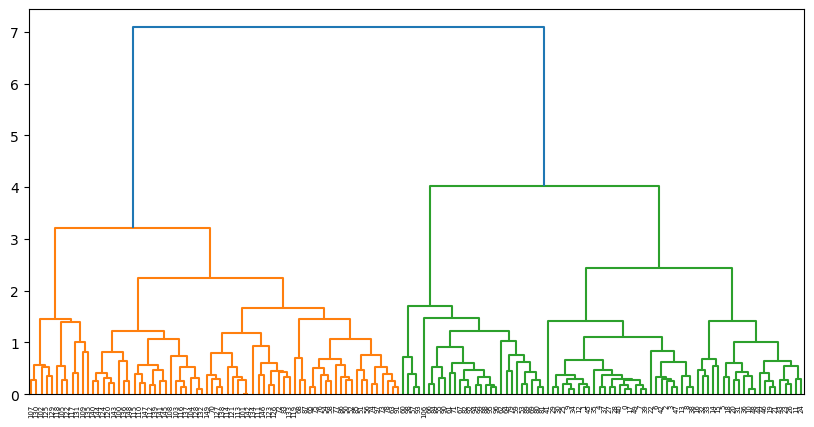

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
Z = linkage(X, 'complete')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

Finally, we use the `AgglomerativeClustering` function from the `sklearn` library to perform agglomerative clustering with the number of identified clusters (in this case 3) using the "complete" method. We then plot the resulting clusters using a scatter plot with the sepal length on the x-axis and the sepal width on the y-axis. Each data point is colored according to its cluster label.

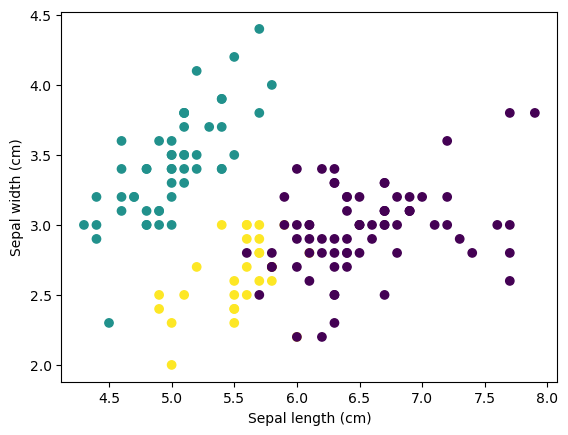

In [12]:
# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg_cluster_labels = agg_cluster.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster_labels, cmap='viridis')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points based on their density. The algorithm is particularly useful for datasets where clusters have irregular shapes or vary in size.

DBSCAN works by defining a radius around each data point, and then counting the number of other data points within that radius. Points that fall within a certain density threshold are considered to be part of a cluster, while points that are isolated are classified as noise.

To perform DBSCAN clustering in Python, you can use the `DBSCAN` function from the `sklearn.cluster` module. The function takes a few parameters, including:

- `eps`: The radius of each data point's neighborhood.
- `min_samples`: The minimum number of points required to form a cluster.
- `metric`: The distance metric used to measure the similarity between data points.

Here's how to use DBSCAN on the iris dataset:

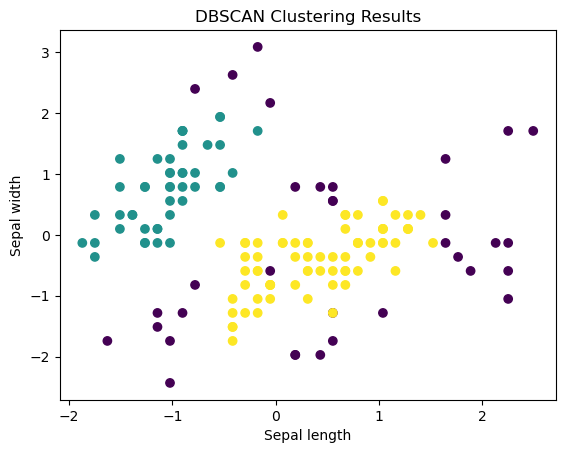

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('DBSCAN Clustering Results')
plt.show()

## Conclusion

#### KMeans Clustering:

###### Pros:

- It is computationally efficient and can handle a large number of samples and features.
- It is easy to understand and implement.
- It can work well when the clusters are well-separated and have a spherical shape.

###### Cons:

- The number of clusters must be known beforehand.
- The algorithm is sensitive to the initial choice of cluster centers, which can result in different results for different initializations.
- It does not work well when the clusters have a non-spherical shape or when they have different sizes and densities.

#### Hierarchical Clustering:

###### Pros:

- It does not require the number of clusters to be specified beforehand.
- It can create a hierarchy of clusters, which can be useful in some applications.
- It can work well when the clusters have a non-spherical shape or when they have different sizes and densities.

###### Cons:

- It can be computationally expensive, especially for large datasets.
- It can be sensitive to the choice of distance metric and linkage criteria.
- It can be difficult to interpret the results when the hierarchy is complex.

#### DBSCAN Clustering:

###### Pros:

- It does not require the number of clusters to be specified beforehand.
- It can work well when the clusters have a non-spherical shape or when they have different sizes and densities.
- It can identify noise points that do not belong to any cluster.

###### Cons:

- It can be sensitive to the choice of the distance metric and the value of the eps parameter.
- It can be computationally expensive for large datasets.
- It can be difficult to choose appropriate values for the eps and min_samples parameters.